In [5]:
from torch import nn

# Define Model
class simple_network(nn.Module):
    def __init__(self):
        super(simple_network, self).__init__()
        self.conv0   = nn.Conv2d    (   1,  8,   kernel_size=(3, 3),     bias=False  , padding=1)   
        self.max0    = nn.MaxPool2d (            kernel_size=(2,2)                   )   
        self.conv1   = nn.Conv2d    (   8,  16,  kernel_size=(3, 3),     bias=False , padding=1 )   
        self.max1    = nn.MaxPool2d (            kernel_size=(2,2)                   )   
        self.flat    = nn.Flatten   (                                                )   
        self.linear0 = nn.Linear    (            784,  784                           )
        self.linear1 = nn.Linear    (            784,  10                            )
        self.soft    = nn.Softmax   (            dim=1                               )
        
        self.debug=False
        

    def forward(self,x):
        x=x.to(torch.device("cpu"))
        x_conv0      = self.conv0     (   x              )  
        x_max0       = self.max0      (   x_conv0        )
        x_conv1      = self.conv1     (   x_max0         )  
        x_max1       = self.max1      (   x_conv1        )
        x_flat       = self.flat      (   x_max1         )
        x_linear0    = self.linear0   (   x_flat         )
        x_linear1    = self.linear1   (   x_linear0      )
        x_prob       = self.soft      (   x_linear1      )

        # TODO: Fix Learning Rate and Gradient Descent Method, check batch size
        if self.debug:
            im=x[0][0]
            print(f"Input Image: {im[-4]}\n")
            
            print(f"conv0 filters: {model.state_dict()['conv0.weight'][0][0]}\n")
            
            print(f"x_conv0 : {x_conv0[0,0,:,:][-1]}\n")

            print(f"MaxPool0: {x_max0[0,0][-1]}\n")
            
            print(f"conv1 filters: {model.state_dict()['conv1.weight'][0][0]}\n")
            
            print(f"x_conv1 : {x_conv1[0,0,:,:][-1]}\n")

            print(f"MaxPool1: {x_max1[0,0][-1]}\n")
            
            print(f"FC0 Weight: {model.state_dict()['linear0.weight'][0][:10]}\n")
            
            print(f"FC0 Output: {x_linear0[0,:10]}\n")
            
            print(f"FC1 Weight: {model.state_dict()['linear1.weight'][0][:10]}\n")
            
            print(f"FC1 Output: {x_linear1[0,:10]}\n")
            
            print(f"SoftMax Output: {x_prob}\n")
            
        return x_prob

In [6]:
# func: model load
import torch
import pickle
# Function for copying weights from basic model 
def copy_weights(name="weights/last.pkl"):
    # TODO: To copy filter weights
    # name = "weights/debug.pkl"
    print(f"Loading weights from {name}")
    weight_file = open(name, "rb")
    weights = pickle.load(weight_file)
    print(f"\nLoading weights from {name} file")
    
    fconv0   = weights["conv0"]  
    fconv1   = weights["conv1"]  
    flinear0 = weights["fc0_weights"]
    blinear0 = weights["fc0_biases" ]
    flinear1 = weights["fc1_weights"]
    blinear1 = weights["fc1_biases" ]

    debug=False
    for i in range(fconv0.shape[0]):
        model.state_dict()['conv0.weight'][i][0]     = torch.from_numpy(fconv0[i]).double()
        if debug: print(f"Weights for Conv0 Filter {i} are {model.state_dict()['conv0.weight'][i][0][0]}   ")

    for i in range(fconv1.shape[0]):
        for j in range(fconv1.shape[3]):
            model.state_dict()['conv1.weight'][i,j,:,:]     = torch.from_numpy(fconv1[i,:,:,j]).double()
        if debug: print(f"Weights for Conv1 Filter {i} are {model.state_dict()['conv1.weight'][i][0][0]}   ")

    for i in range(flinear0.shape[1]):
        model.state_dict()['linear0.weight'][i]      = torch.from_numpy(flinear0[:,i]).double()
        if debug and i<10: print(f"Weights for Linear Filter {i} are {model.state_dict()['linear0.weight'][i][:5]} ")
        
    for i in range(blinear0.shape[0]):
        model.state_dict()['linear0.bias'][i]        = torch.tensor(blinear0[i]).double()
        if debug and i<10: print(f"Weights for Linear Bias   {i} are {model.state_dict()['linear0.bias'][i]}   ")
    
    for i in range(flinear1.shape[1]):
        model.state_dict()['linear1.weight'][i]      = torch.from_numpy(flinear1[:,i]).double()
        if debug and i<10: print(f"Weights for Linear Filter {i} are {model.state_dict()['linear1.weight'][i][:5]} ")
        
    for i in range(blinear1.shape[0]):
        model.state_dict()['linear1.bias'][i]        = torch.tensor(blinear1[i]).double()
        if debug and i<10: print(f"Weights for Linear Bias   {i} are {model.state_dict()['linear1.bias'][i]}   ")

In [7]:
# func to draw
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [8]:
# load model
model = simple_network()
model.double()
copy_weights()

Loading weights from weights/last.pkl

Loading weights from weights/last.pkl file


In [20]:
# pre-trained model
from torch import nn
import torch
from torchvision import transforms
import timm
import torchvision

backbone = torchvision.models.resnext50_32x4d(pretrained=False)
backbone.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
backbone.fc = nn.Sequential(nn.Linear(2048,1024),nn.Linear(1024,10))

class ResNext(nn.Module):
    def __init__(self):
        super(ResNext,self).__init__()
        
        self.backbone = torchvision.models.resnext50_32x4d(pretrained=False)
        self.backbone.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.backbone.fc = nn.Sequential(nn.Linear(2048,1024),nn.Linear(1024,10))
        
    def forward(self,x):
        x = self.backbone(x)
        return x

In [65]:
model = ResNext()

In [46]:
# simple model test
s = torch.rand((5,1,28,28)).double()

In [47]:
model(s)

tensor([[-0.0770, -0.0402, -0.8301, -0.4712, -0.1191, -1.0804, -0.1752,  0.1088,
          0.0568, -0.4988],
        [-0.6753,  0.1327,  0.6332, -0.3642, -0.1273, -0.3996, -0.0660,  0.5603,
          1.0975, -0.4117],
        [-0.2962, -0.9567,  0.3431, -0.4660, -0.1789, -0.2497, -0.1046,  0.3965,
          0.7384,  0.3262],
        [-0.2179,  0.0992,  0.5345,  0.2429, -0.0903, -0.6376, -0.1057,  0.5583,
          0.8245,  0.0354],
        [-0.0076,  0.5713,  0.1030, -0.2154,  0.0358, -0.4076, -0.4871,  0.2615,
          0.6390, -0.6172]], dtype=torch.float64, grad_fn=<AddmmBackward0>)

# train 

In [69]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

trdt = datasets.MNIST(
    root="../MNIST",
    train=True,
    download=True,
    transform=ToTensor(),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 64
epochs = 200
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Create data loaders.
trdl = DataLoader(trdt, batch_size=batch_size)
# test_dataloader = DataLoader(test_data, batch_size=batch_size)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    model.to(device)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [70]:
for t in range(epochs):
    train(trdl, model, loss_fn, optimizer)

loss: 2.424981  [    0/60000]
loss: 2.224789  [ 6400/60000]
loss: 2.163543  [12800/60000]
loss: 1.987360  [19200/60000]
loss: 1.847370  [25600/60000]
loss: 1.647906  [32000/60000]
loss: 1.247738  [38400/60000]
loss: 1.302227  [44800/60000]
loss: 1.116937  [51200/60000]
loss: 0.846215  [57600/60000]
loss: 0.749775  [    0/60000]
loss: 0.622229  [ 6400/60000]
loss: 0.447351  [12800/60000]
loss: 0.527802  [19200/60000]
loss: 0.373838  [25600/60000]
loss: 0.414319  [32000/60000]
loss: 0.279140  [38400/60000]
loss: 0.400183  [44800/60000]
loss: 0.318236  [51200/60000]
loss: 0.283626  [57600/60000]
loss: 0.304796  [    0/60000]
loss: 0.206063  [ 6400/60000]
loss: 0.195198  [12800/60000]
loss: 0.297121  [19200/60000]
loss: 0.268274  [25600/60000]
loss: 0.264658  [32000/60000]
loss: 0.180940  [38400/60000]
loss: 0.272176  [44800/60000]
loss: 0.198390  [51200/60000]
loss: 0.245579  [57600/60000]
loss: 0.210647  [    0/60000]
loss: 0.206145  [ 6400/60000]
loss: 0.142436  [12800/60000]
loss: 0.19

## save&load 

In [71]:
torch.save(model.state_dict(), "./weights/resnext.pth")

In [ ]:
model = ResNext()
model.load_state_dict(torch.load("./weights/resnext.pth"))

# prediction 

In [49]:
# load samples from MNIST test dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

data_folder = '../MNIST'
tedt = datasets.MNIST(
    root=data_folder,
    train=False,
    download=True,
    transform=ToTensor(),
)

trdl = DataLoader(trdt, batch_size=5)

trit = iter(trdl)
x,y = next(trit)

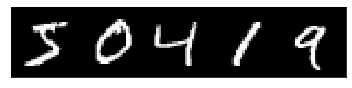

In [50]:
# draw samples
from torchvision.utils import make_grid
show(make_grid(x))

In [53]:
# predict
x = x.double()
pre = model(x)

pre_arg = pre.argmax(1)

In [76]:
print(f'GT: {y.tolist()} \nPre: {pre_arg.tolist()}')

GT: [5, 0, 4, 1, 9] 
Pre: [3, 0, 4, 8, 9]
